In [1]:
import pandas as pd
import pylab
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
path1 = r'C:\Users\guoqi\Desktop\大学规划\Machine_Learning Basic Knowledge\第三模块_必备数学知识\假设检验\us_job_market_discrimination.dta'
path2 = r'C:\Users\guoqi\Desktop\大学规划\Machine_Learning Basic Knowledge\第三模块_必备数学知识\假设检验\假设检验实例\normtemp.txt'

In [3]:
df = pd.read_csv(path2, sep='   ', names=['Temperature','Gender','Heart Rate'])

In [4]:
df.describe()

,Temperature,Gender,Heart Rate
count,130.000000,130.000000,130.000000
mean,98.249231,1.500000,73.761538
std,0.733183,0.501934,7.062077
min,96.300000,1.000000,57.000000
25%,97.800000,1.000000,69.000000
50%,98.300000,1.500000,74.000000
75%,98.700000,2.000000,79.000000
max,100.800000,2.000000,89.000000


In [5]:
df.head()

,Temperature,Gender,Heart Rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


AttributeError: 'Rectangle' object has no property 'normed'

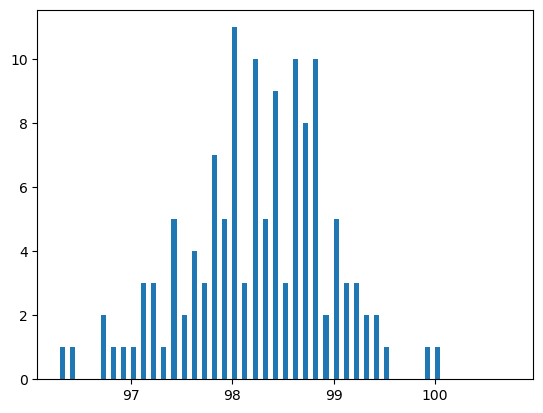

In [6]:
observed_temperatures = df['Temperature'].sort_values()
bin_val = np.arange(start= observed_temperatures.min(), stop= observed_temperatures.max(), step = .05)
mu, std = np.mean(observed_temperatures), np.std(observed_temperatures)


p = norm.pdf(observed_temperatures, mu, std)


plt.hist(observed_temperatures,bins = bin_val, normed=True, stacked=True)
plt.plot(observed_temperatures, p, color = 'red')
plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)
plt.xlabel('Human Body Temperature Distributions')
plt.xlabel('human body temperature')
plt.show()


print('Average (Mu): '+ str(mu) + ' / ' 'Standard Deviation: '+str(std))

Shapiro-Wilk Stat: 0.9865769743919373  Shapiro-Wilk p-Value: 0.2331680953502655
p: 0.2587479863488212


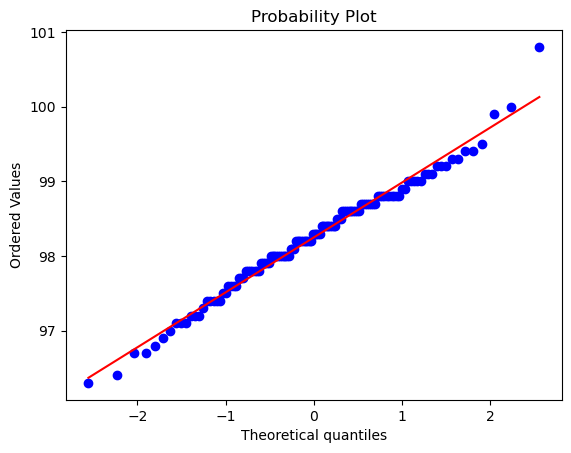

In [7]:
x = observed_temperatures

#Shapiro-Wilk Test: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
shapiro_test, shapiro_p = scipy.stats.shapiro(x)
print("Shapiro-Wilk Stat:",shapiro_test, " Shapiro-Wilk p-Value:", shapiro_p)

k2, p = scipy.stats.normaltest(observed_temperatures)
print('p:',p)


#Another method to determining normality is through Quantile-Quantile Plots.
scipy.stats.probplot(observed_temperatures, dist="norm", plot=pylab)
pylab.show()

Mean temperature:  98.24923076923076 with standard deviation of +/- 0.730357778905038


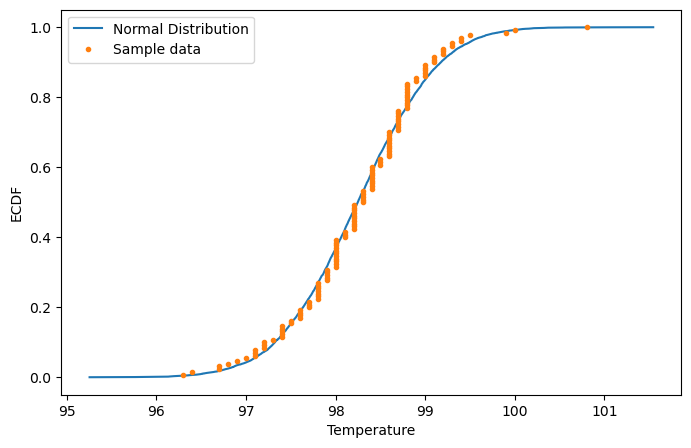

In [8]:
def ecdf(data):
    #Compute ECDF
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Compute empirical mean and standard deviation

# Number of samples
n = len(df['Temperature']) 

# Sample mean
mu = np.mean(df['Temperature']) 

# Sample standard deviation
std = np.std(df['Temperature']) 

print('Mean temperature: ', mu, 'with standard deviation of +/-', std)

#Random sampling of the data based off of the mean of the data.
normalized_sample = np.random.normal(mu, std, size=10000)
x_temperature, y_temperature = ecdf(df['Temperature'])
normalized_x, normalized_y = ecdf(normalized_sample)

# Plot the ECDFs
fig = plt.figure(figsize=(8, 5))
plt.plot(normalized_x, normalized_y)
plt.plot(x_temperature, y_temperature, marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.xlabel('Temperature')
plt.legend(('Normal Distribution', 'Sample data'))

In [9]:
from scipy import stats

CW_mu = 98.6
stats.ttest_1samp(df['Temperature'], CW_mu, axis=0)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

In [10]:
female_temp = df.Temperature[df.Gender == 2]
male_temp = df.Temperature[df.Gender == 1]
mean_female_temp = np.mean(female_temp)
mean_male_temp = np.mean(male_temp)
print('Average female body temperature = ' + str(mean_female_temp))
print('Average male body temperature = ' + str(mean_male_temp))

# Compute independent t-test 
stats.ttest_ind(female_temp, male_temp, axis=0)

Average female body temperature = 98.39384615384616
Average male body temperature = 98.1046153846154


Ttest_indResult(statistic=2.2854345381654984, pvalue=0.02393188312240236)

由于P值=0.024 < 0.05，我们需要拒绝原假设，我们有%95的自信认为是有差异的！

# 卡方检验

In [13]:
data = pd.io.stata.read_stata(path1)
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [14]:
blacks = data[data.race == 'b']
whites = data[data.race == 'w']

In [16]:
blacks.call.describe()

count    2435.000000
mean        0.064476
std         0.245649
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

In [17]:
whites.call.describe()

count    2435.000000
mean        0.096509
std         0.295346
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

In [22]:
blacks_called = len(blacks[blacks['call'] == True])
blacks_not_called = len(blacks[blacks['call'] == False])
whites_called = len(whites[whites['call'] == True])
whites_not_called = len(whites[whites['call'] == False])

In [23]:
observed = pd.DataFrame({'blacks': {'called': blacks_called, 'not_called': blacks_not_called},
                         'whites': {'called' : whites_called, 'not_called' : whites_not_called}})

In [24]:
observed

,blacks,whites
called,157,235
not_called,2278,2200


In [25]:
num_called_back = blacks_called + whites_called
num_not_called = blacks_not_called + whites_not_called

print(num_called_back)
print(num_not_called)

392
4478


In [26]:
rate_of_callbacks = num_called_back / (num_not_called + num_called_back)

In [27]:
rate_of_callbacks

0.08049281314168377

In [28]:
expected_called = len(data) * rate_of_callbacks
expected_not_called = len(data) * (1-rate_of_callbacks)

In [29]:
print(expected_called)
print(expected_not_called)

391.99999999999994
4478.0


In [30]:
observed_frequencies = [blacks_not_called, whites_not_called, whites_called, blacks_called]
expected_frequencies = [expected_not_called/2, expected_not_called/2, expected_called/2, expected_called/2]


stats.chisquare(f_obs = observed_frequencies,
                f_exp = expected_frequencies)

Power_divergenceResult(statistic=16.87905041427022, pvalue=0.0007483959441097264)